<a href="https://colab.research.google.com/github/rpizarrog/simulacion/blob/main/python%20casos/Caso_10_Prueba_de_Yule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Determinar e interpretar la prueba de Yule

# Descripción

* A partir de unos datos recabados y cargados se forma tabla de contingencia
* Se determina el valor de *p_prueba* (probabilidad)
* Se determina los valores a, b, c y d de la tabla de contingencia de una estructura de n * n (2 * 2).
* Se determina el valor de alfa de significacncia, normalmente al $\alpha = 0.05$.
* Se contrasta el valor de *p_prueba* contra el valor de significancia $\alpha=0.05$ y se toma la decisión de si el valor de Yule tiene un significado entre las variables.

Decisión:

$$
\text{Si } (\chi^{2} < p.valor)\text{: Hay significancia estadística}
$$

$$
\text{de lo contrario:} \text{ No hay significancia estadística}
$$


La fórmula para calcular prueba de Yule; el valor debe salir entre -1 y 1 y significa nivel de relación entre las variables:
$$
Yule = Q = \frac{a\cdot d - b\cdot c}{a\cdot d + b\cdot c}
$$

La fórmula para determinar el valor de chi cuadrada calculada para el contraste contra el valor de *p_valor* de acuerdo al valor de significancia de *alfa* y a un grado $(gl = 1)$ de libertad.

* Si $Q$ está cerca de -1, indica una asociación negativa (las variables están inversamente relacionadas).
* Si $Q$ está cerca de 1, indica una asociación positiva (las variables están directamente relacionadas).
* Si $Q$ está cerca de 0, indica que no hay una asociación lineal.

$$
Chi cuadrada = \chi^{2} = \frac{(a\cdot d-b\cdot c)^2\cdot(a+b+c+d)}{(a+b)\cdot(c+d)\cdot(a+c)\cdot(b+d)}
$$

El valor p (*p_valor*) representa la probabilidad de observar un estadístico de prueba igual o más extremo que el calculado, asumiendo que las variables son independientes.

Si el valor p es menor que un nivel de significancia predefinido ($0.05$), se considera que existe una asociación significativa entre las variables.






# Desarrollo





## Cargar librerías




In [ ]:
# Instalar para la sesión de este caso
!pip install scipy


In [2]:
import numpy as np
from scipy.stats import chi2_contingency

## Funciones

In [22]:
# Funciones
def f_visualizar_chi_prueba_Yule (datos, suma_chi_cuad, valor_prueba_chi, gl, alfa):
  x = np.linspace(np.min(datos), np.max(datos) * 10, 1000)
  pdf = chi2.pdf(x, df = gl)
  # alfa = 0.05

  # Visualizar
  plt.figure(figsize=(10, 6))
  plt.plot(x, pdf, label=f'Chi-cuadrado ({gl} grados de libertad)')
  plt.axvline(x = suma_chi_cuad, color='green', linestyle='--', label=f'Suma Chi cuadrada calculada  = {suma_chi_cuad}')
  plt.axvline(x = valor_prueba_chi, color='red', linestyle='--', label=f'Estadístico Chi-cuadrado = {valor_prueba_chi}')

  # Agregar un sombreado en el área de rechazo
  x_rechazo = np.linspace(chi2.ppf(1 - alfa, df=gl), 30, 1000)
  plt.fill_between(x_rechazo, chi2.pdf(x_rechazo, df=gl), color='red', alpha=0.2, label=f'Área de Rechazo (alfa = {alfa})')

  # Etiquetas y leyenda
  plt.xlabel('Valor de Chi-cuadrado')
  plt.ylabel('Densidad de Probabilidad')
  plt.legend()

  # Mostrar el resultado en el gráfico
  plt.annotate(decision, xy=(1, 0.1), fontsize=12, color='blue')
  plt.title('Distribución Chi-cuadrado y Resultado de Prueba')

  # Mostrar el gráfico
  plt.show()

## Cargar los datos

Se recupera una encuesta sobre el estudio de dos variables.

Se hizo una encuesta y fueron seleccionadas aleatoriamente 300 personas.

Se le preguntó a su género que puede ser hombre y mujer etiquetado de la siguiente manera:
* H: Hombre
* M: Mujer
¿Cuál es su género? H: Hombre o M:Mujer

Se les preguntó si consumen alcohol hoy en día (presente) en su distintas denominaciones (cerveza, vino, tequila mezcal, bebidas preparadas, entre otros) y en cualquier cantidad, sean dosis mínimas equilabradas y saluables o ingesta de alcohol.

¿Consume alcohol? Si o No.


## Aquí la tabla de contingencia
\begin{array}{c} \hline
 &  \text{No consume} & \text{Si consume} \\ \hline
 Género&  &  \\
H: Hombre & 15 & 238 \\
M: Mujer & 11 & 46 \\ \hline
\end{array}



## Hacer pueba de Yule

In [15]:
# Crear una tabla de contingencia a partir de tus datos
tabla_de_contingencia = np.array([[15, 238], [11, 46]])  # FALSE/TRUE en función de género

print("Aquí la tabla de contingencia: ")
print("\n")
print(tabla_de_contingencia)
print("\n")


# Realizar la prueba de chi-cuadrado de independencia
chi2, p_valor, _, _ = chi2_contingency(tabla_de_contingencia)

# Calcular el coeficiente de Yule
a, b, c, d = tabla_de_contingencia.ravel()  # Extraer los valores de la tabla
Yule_coefficient = (a * d - b * c) / (a * d + b * c)

print(f'Valor de Yule: {Yule_coefficient:.2f}')
print(f'Valor de chi2: {chi2:.2f}')
print(f'Valor p_valor (chi-cuadrado): {p_valor:.4f}')


# Verificar el valor de p

# Realizar una prueba de significancia (se puede ajustar el nivel de significancia )
alfa = 0.05
print ("Hay distinción enre consumo de alcohol enre hombres y mujeres ?")
if p_valor < alfa:
    print('Existe una asociación significativa entre las variables, estadísticamente hablando.')
else:
    print('No hay evidencia de una asociación significativa entre las vaiables, estadísticamente hablando.')

Aquí la tabla de contingencia: 


[[ 15 238]
 [ 11  46]]


Valor de Yule: -0.58
Valor de chi2: 9.15
Valor p_valor (chi-cuadrado): 0.0025
Hay distinción enre consumo de alcohol enre hombres y mujeres ?
Existe una asociación significativa entre las variables, estadísticamente hablando.


## Visualización



In [ ]:
# Pendiente

# Relación estudiar no estudiar aprobar no aprobar

\begin{array}{c} \hline
 &  \text{No aprobar} & \text{Aprobar} \\ \hline
 Estudio&  &  \\
Estudiar & 15 & 40 \\
No estudiar & 25 & 20 \\ \hline
\end{array}

In [14]:
# Crear una tabla de contingencia a partir de tus datos
tabla_de_contingencia = np.array([[15, 40], [25, 20]])  # FALSE/TRUE en función de género

print("Aquí la tabla de contingencia: ")
print("\n")
print(tabla_de_contingencia)
print("\n")

# Realizar la prueba de chi-cuadrado de independencia
chi2, p_valor, _, _ = chi2_contingency(tabla_de_contingencia)

# Calcular el coeficiente de Yule
a, b, c, d = tabla_de_contingencia.ravel()  # Extraer los valores de la tabla
Yule_coefficient = (a * d - b * c) / (a * d + b * c)

print(f'Valor de Yule: {Yule_coefficient:.2f}')
print(f'Valor de chi2: {chi2:.2f}')
print(f'Valor p_valor (chi-cuadrado): {p_valor:.4f}')


# Verificar el valor de p

# Realizar una prueba de significancia (se puede ajustar el nivel de significancia )
alfa = 0.05
print ("Estudiar o preparar, implica aprobar o no aprobar un examen ?")
if p_valor < alfa:
    print('Existe una asociación significativa entre las variables.')
else:
    print('No hay evidencia de una asociación significativa.')

Aquí la tabla de contingencia: 


[[15 40]
 [25 20]]


Valor de Yule: -0.54
Valor de chi2: 7.11
Valor p_valor (chi-cuadrado): 0.0077
Estudiar o preparar, implica aprobar o no aprobar un examen ?
Existe una asociación significativa entre las variables.


In [ ]:
# Visualizar

# PEndiente

## Relación entre hacre deporte y lesiones



\begin{array}{c} \hline
 &  \text{No lesión} & \text{Lesión} \\ \hline
 Deporte&  &  \\
Si hace deporte & 18 & 18 \\
No hace deporte & 20 & 44 \\ \hline
\end{array}



## Los datos

Se cargan los datos ...


In [26]:
import pandas as pd
url = "https://raw.githubusercontent.com/rpizarrog/simulacion/main/datos/deporte_lesiones.csv"
datos = pd.read_csv(url)
datos

,Unnamed: 0,deporte,lesion
0,1,SI HACE DEPORTE,False
1,2,SI HACE DEPORTE,True
2,3,SI HACE DEPORTE,True
3,4,NO HACE DEPORTE,False
4,5,NO HACE DEPORTE,True
...,...,...,...
95,96,SI HACE DEPORTE,True
96,97,SI HACE DEPORTE,True
97,98,SI HACE DEPORTE,False
98,99,SI HACE DEPORTE,True


## Construir tabla a partir de los datos

In [38]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(index=datos['deporte'], columns=datos['lesion'])

# Mostrar la tabla de contingencia
print(tabla_contingencia)

fila_no_hace_deporte = tabla_contingencia.loc['NO HACE DEPORTE']
a = fila_no_hace_deporte[0]
b = fila_no_hace_deporte[1]

fila_si_hace_deporte = tabla_contingencia.loc['SI HACE DEPORTE']
c = fila_si_hace_deporte[0]
d = fila_si_hace_deporte[1]

print (a, b, c, d)





lesion           False  True 
deporte                      
NO HACE DEPORTE      8     19
SI HACE DEPORTE     30     43
8 19 30 43


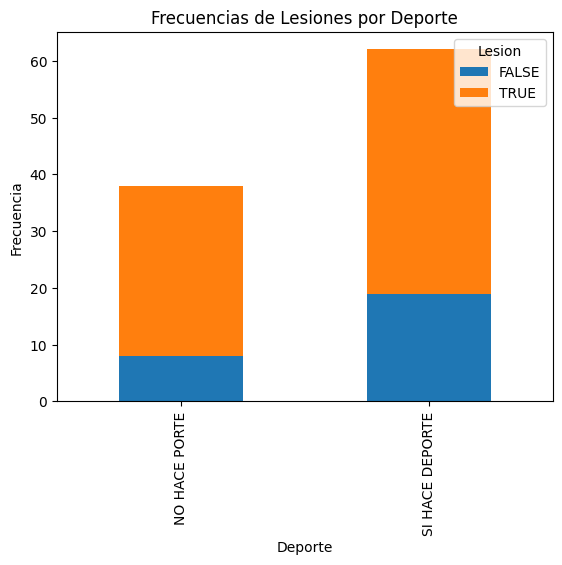

In [39]:

# Esto que sea dinámico a, b, c, d
import matplotlib.pyplot as plt

data = {
    'deporte': ['NO HACE PORTE', 'SI HACE DEPORTE'],
    'FALSE': [8, 19],
    'TRUE': [30, 43]
}

df = pd.DataFrame(data)

ax = df.plot(kind='bar', x='deporte', stacked=True)
plt.xlabel('Deporte')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Lesiones por Deporte')
plt.legend(title='Lesion', loc='upper right')
plt.show()


In [41]:
# Crear una tabla de contingencia a partir de tus datos
tabla_de_contingencia = np.array([[a, b], [c, d]])  # deporte en función de lesion

print("Aquí la tabla de contingencia: ")
print("\n")
print(tabla_de_contingencia)
print("\n")

# Realizar la prueba de chi-cuadrado de independencia
chi2, p_valor, _, _ = chi2_contingency(tabla_de_contingencia)

# Calcular el coeficiente de Yule
a, b, c, d = tabla_de_contingencia.ravel()  # Extraer los valores de la tabla
Yule_coefficient = (a * d - b * c) / (a * d + b * c)

print(f'Valor de Yule: {Yule_coefficient:.2f}')
print(f'Valor de chi2: {chi2:.2f}')
print(f'Valor p_valor (chi-cuadrado): {p_valor:.4f}')


# Verificar el valor de p

# Realizar una prueba de significancia (se puede ajustar el nivel de significancia )
alfa = 0.05
print ("Hacer o no hace rdeporte, implica lesiones ?")
if p_valor < alfa:
    print('Existe una asociación significativa entre las variables.')
else:
    print('No hay evidencia de una asociación significativa.')

Aquí la tabla de contingencia: 


[[ 8 19]
 [30 43]]


Valor de Yule: -0.25
Valor de chi2: 0.67
Valor p_valor (chi-cuadrado): 0.4141
Estudiar o preparar, implica aprobar o no aprobar un examen ?
No hay evidencia de una asociación significativa.


# Interpretación

El valor *p_value* en una prueba estadística, en la prueba de Yule, se utiliza para determinar si existe una relación estadísticamente significativa entre las variables categóricas que se analizza,

Para este ejercicio resultó que si hay evidencia para concluir que hay una relación significativa a la inversa entre el consumo de alcohol entre hombre y mujeres. Se observa que los hombres consumen más alcohol y estadísticamente se hizo la prumeba que así lo demuestra.